In [12]:
include("functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


In [52]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.01, 0.33, branchN + 1))

# Define the values for the parameters
N = 46
L = π
b = 0.1
λ2 = 1.5
vf = 1.0

# Create an instance of the Constants struct
constants = Constants(N, L, b, λ2, vf)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]

## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-8, solver = :LevenbergMarquardt, max_iter = 10000);

46.1.0e-8.100.LevenbergMarquardt
Branch point 10 of 100, 13 iterations.
Branch point 20 of 100, 3 iterations.
Branch point 30 of 100, 3 iterations.
Branch point 40 of 100, 3 iterations.
Branch point 50 of 100, 3 iterations.
Branch point 60 of 100, 7 iterations.
Branch point 70 of 100, 11 iterations.
Branch point 80 of 100, 13 iterations.
Branch point 90 of 100, 10 iterations.
Branch point 100 of 100, 11 iterations.
154.840412 seconds (11.11 G allocations: 419.423 GiB, 25.19% gc time)


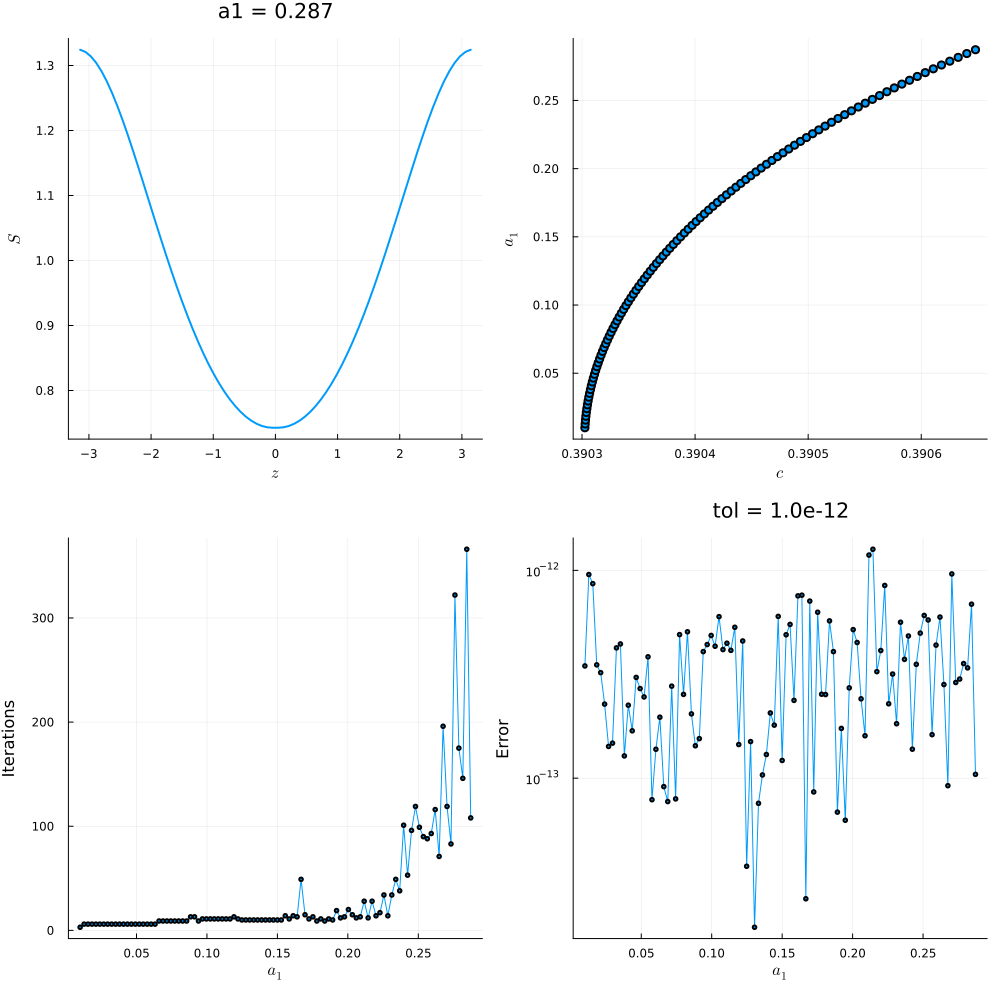

In [53]:
# plotting 
file_name = "36.1.0e-12.100.Broyden"
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting(file_name)
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

# get the constants for this run from the metadata file 


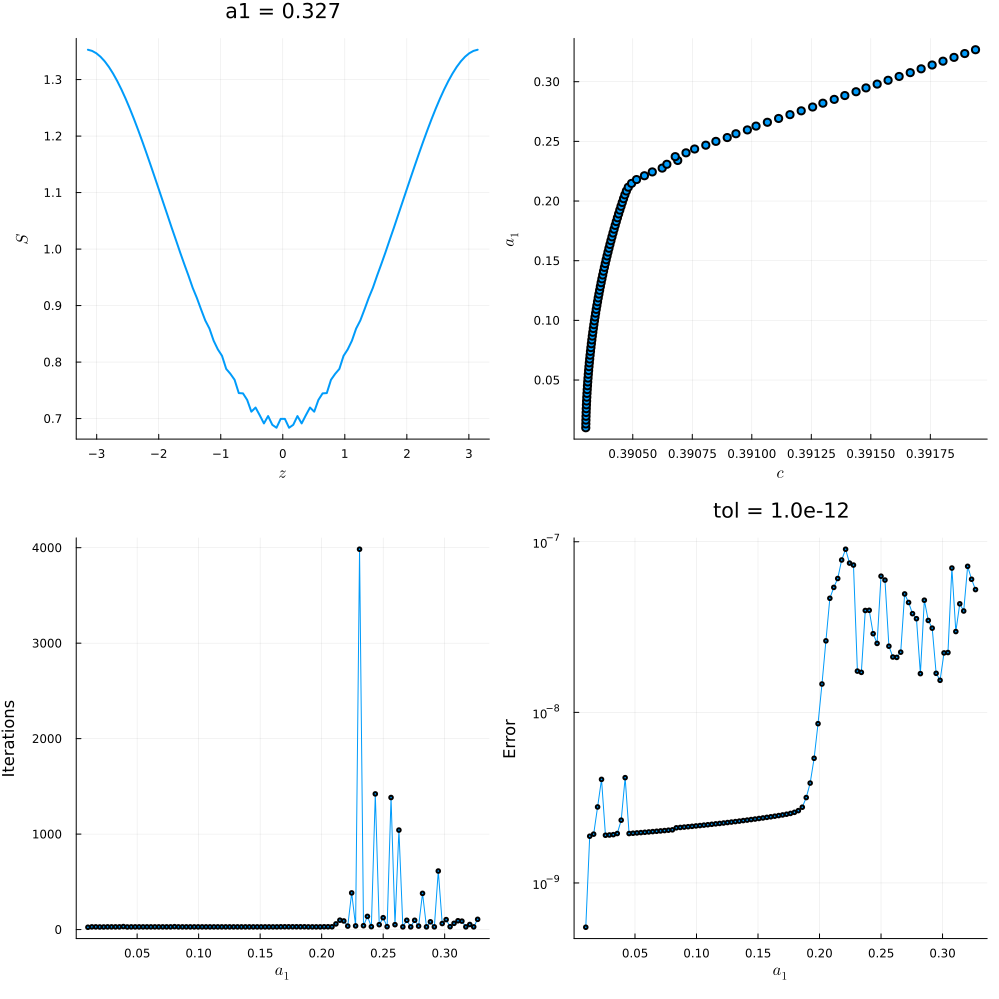

In [54]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("46.1.0e-12.100.LevenbergMarquardt")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

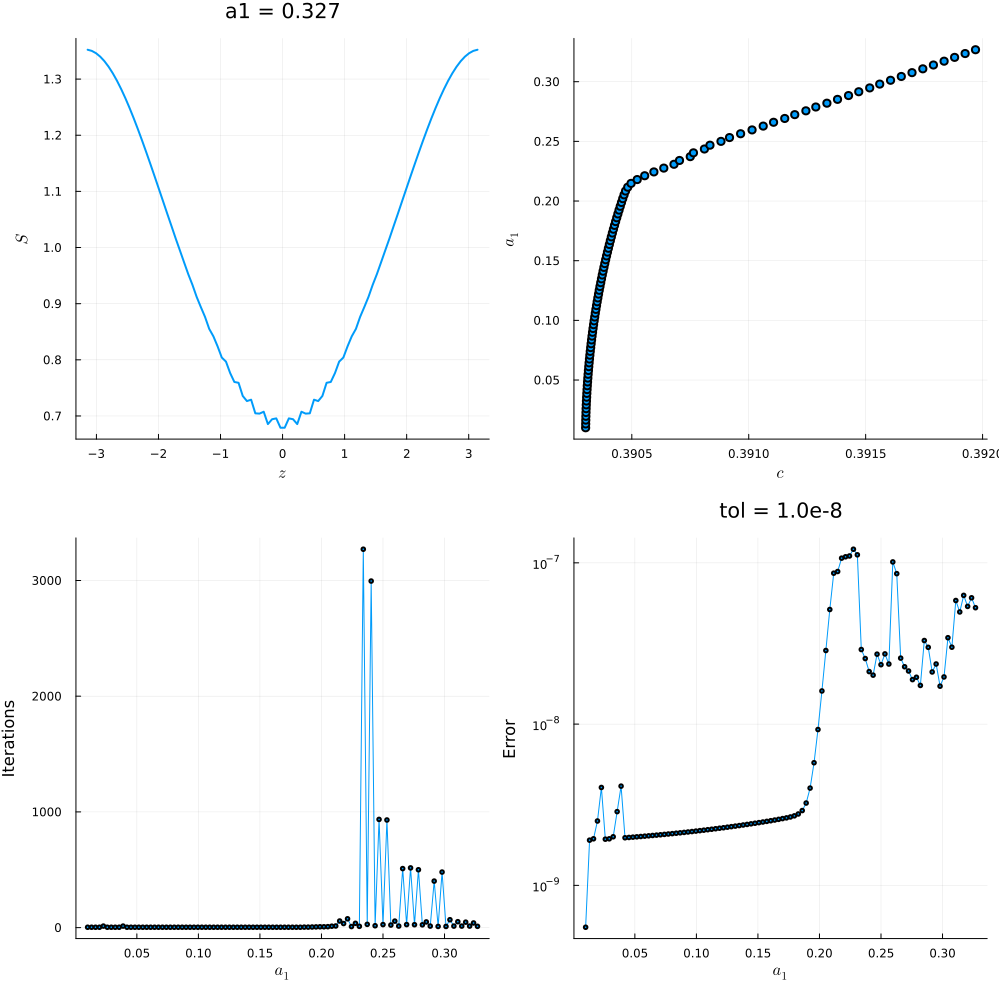

In [55]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("46.1.0e-8.100.LevenbergMarquardt")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

In [25]:
unknowns = initial_guess[1,:]

# problem constants 
z = constants.z::Vector{Float64}
N = 12
b = 0.1
L = π
λ2 = 1.5
vf = 1.0

k = 1

c = unknowns[1]
coeffs = unknowns[2:N+2] # N + 1 coeffs

a0 = coeffs[1]
a1 = coeffs[2]
S, Sz, Szz = fourierSeries(coeffs, z, L)

Szsq = 1 .+ (Sz.^2)

w = (λ2^2)/2 .* (1 .- (1 ./ (S.^4))) .* (c - vf/λ2)^2
one_p = Szsq .* (c^2 .- 2 .* w)
one = k .* S .* sqrt.(Complex.(one_p))

# scatter(real.(one), label = "one")

74-element Vector{ComplexF64}:
 0.39523833474308306 + 0.0im
 0.39522008375704537 + 0.0im
 0.39516546818811915 + 0.0im
 0.39507489912862553 + 0.0im
 0.39494905814499665 + 0.0im
 0.39478889189880806 + 0.0im
   0.394595604656081 + 0.0im
 0.39437064877026906 + 0.0im
  0.3941157132560116 + 0.0im
 0.39383271057273345 + 0.0im
                     ⋮
  0.3941157132560116 + 0.0im
 0.39437064877026906 + 0.0im
   0.394595604656081 + 0.0im
 0.39478889189880806 + 0.0im
 0.39494905814499665 + 0.0im
 0.39507489912862553 + 0.0im
 0.39516546818811915 + 0.0im
 0.39522008375704537 + 0.0im
 0.39523833474308306 + 0.0im

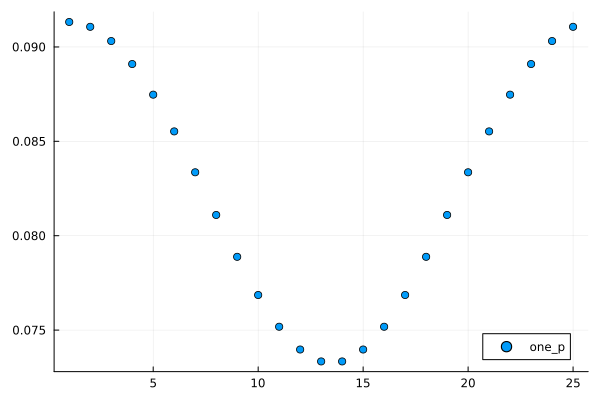

In [46]:
unknowns = initial_guess[1,:]

# problem constants 
z = constants.z::Vector{Float64}
N = 12
B = 1.5
b = 0.1
E = 1 - B/2
L = π

k = 1*π/L

c = unknowns[1]
coeffs = unknowns[2:N+2] # N + 1 coeffs

S, Sz, Szz = fourierSeries(coeffs, z, L)

Szsq = 1 .+ (Sz.^2)

one_p = vec((Szsq).*((c.^2)./2 .- 1 ./ (S.*sqrt.(Szsq)) .+ Szz./(Szsq.^(3/2)) .+ B./(2 .* S.^2) .+ E))
one = k .* S .* sqrt.(Complex.(one_p))

scatter(real.(one), label = "one_p")